# Weighted Average
#### Because skip cycle is more like walk cycle than jump, it is reasonable to add more weight to walk shapelet while warping the shapelets

In [6]:
import pandas as pd
from fastdtw import fastdtw
import numpy as np
import import_ipynb
import matplotlib.pyplot as plt

In [7]:
from Barycenter_DTW import resample_sequence
from ExtractShapelets import vector_accer, find_represt_shapelet

<AxesSubplot: >

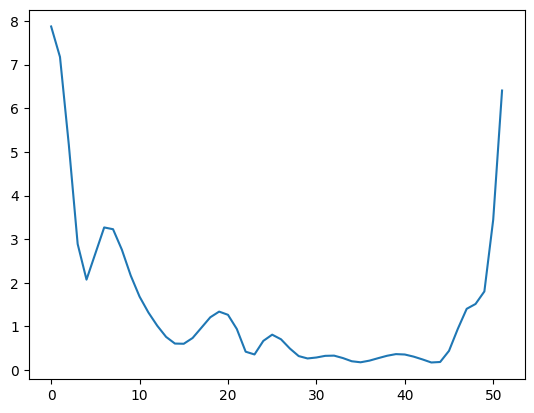

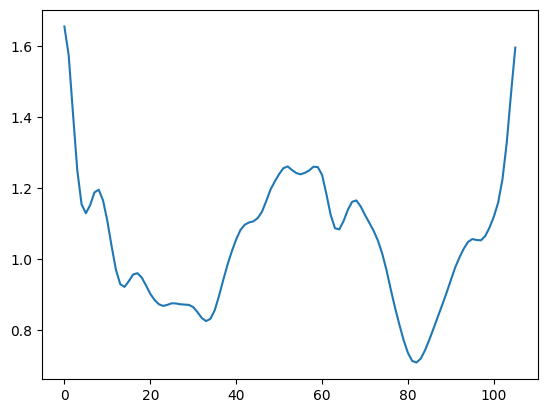

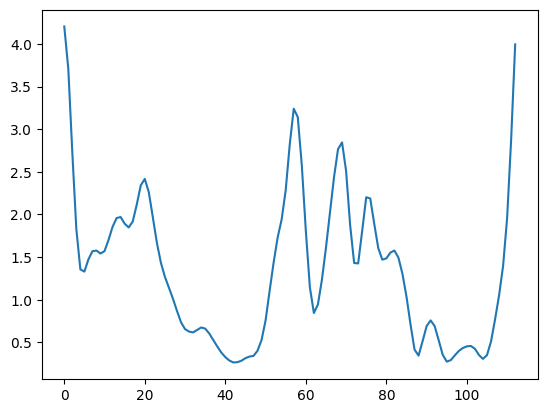

In [8]:
# Jump
zqw_jump = vector_accer("zqw\zqwjumpRAW.csv")['vm'][250:1800]
 # One cycle of walk and skip include 2 cycle of jump, so set the jump shapelet to 2 rounds
jump_rs = find_represt_shapelet(zqw_jump, min_dist=50, thres=0.99, max_dist=60)

# Walk
zqw_walk = vector_accer("zqw\zqwwalkRAW.csv")['vm'][0: 5400]
walk_rs = find_represt_shapelet(zqw_walk, min_dist=100, thres=0.95, max_dist=120)

# skip
zqw_skip = vector_accer("zqw\zqwskipRAW.csv")['vm'][0: 2700]
skip_rs = find_represt_shapelet(zqw_skip, min_dist=100, thres=0.8, max_dist=120)

pd.DataFrame(jump_rs).plot(legend=False)
pd.DataFrame(walk_rs).plot(legend=False)
pd.DataFrame(skip_rs).plot(legend=False)

In [25]:
# Function to calculate the Weighted DTW
def weighted_dtw(df1, df2, df1_weight, df2_weight):
    # Resample the longer sequence to the length of the shorter one
    max_length = max(len(df1), len(df2))
    df1_resampled = pd.DataFrame({col: resample_sequence(df1[col].values, max_length) for col in df1.columns})
    df2_resampled = pd.DataFrame({col: resample_sequence(df2[col].values, max_length) for col in df2.columns})

    # Use the alignment path to calculate the barycenter sequence
    barycenter_seq = df1_resampled.values * df1_weight + df2_resampled.values * df2_weight
    barycenter_seq /= 2

    # Convert the barycenter sequence back to DataFrame
    barycenter_df = pd.DataFrame(barycenter_seq, columns=df1.columns)

    return barycenter_df


In [26]:
df1 = pd.DataFrame(walk_rs)
# double the jump shapelets, because one cycle of walk and skip is two cycle of jump
df2 = pd.concat([pd.DataFrame(jump_rs), pd.DataFrame(jump_rs)], ignore_index=True)
# find the best weight combination
start_value = 0
end_value = 10
step = 0.1
weight_1 = [current_value for current_value in np.arange(start_value, end_value + step, step)]
weight_2 = [current_value for current_value in np.arange(start_value, end_value + step, step)]
weighted_distance = []
min_dist = 100
for weight1 in weight_1:
    for weight2 in weight_2:
        weighted_df = weighted_dtw(df1, df2, weight1, weight2)
        # Distance Comparison
        distance, path = fastdtw(weighted_df, pd.DataFrame(skip_rs))
        weighted_distance.append(distance)
        if (distance < min_dist):
            min_dist = distance

print(min_dist)


19.09361850020912


Barycenter DataFrame:
Distance of walk_jump_barycenter with skip is: 26.133046245162422
Distance of walk with skip is: 56.26958095753236
Distance of jump with skip is: 46.10194053307084
Barycenter DataFrame:
Distance of walk_jump_barycenter with skip is: 25.740848749966627
Distance of walk with skip is: 56.26958095753236
Distance of jump with skip is: 46.10194053307084
Barycenter DataFrame:
Distance of walk_jump_barycenter with skip is: 23.96610097946397
Distance of walk with skip is: 56.26958095753236
Distance of jump with skip is: 46.10194053307084
Barycenter DataFrame:
Distance of walk_jump_barycenter with skip is: 24.296709476506845
Distance of walk with skip is: 56.26958095753236
Distance of jump with skip is: 46.10194053307084
Barycenter DataFrame:
Distance of walk_jump_barycenter with skip is: 26.16084532300993
Distance of walk with skip is: 56.26958095753236
Distance of jump with skip is: 46.10194053307084
Barycenter DataFrame:
Distance of walk_jump_barycenter with skip is: 30.

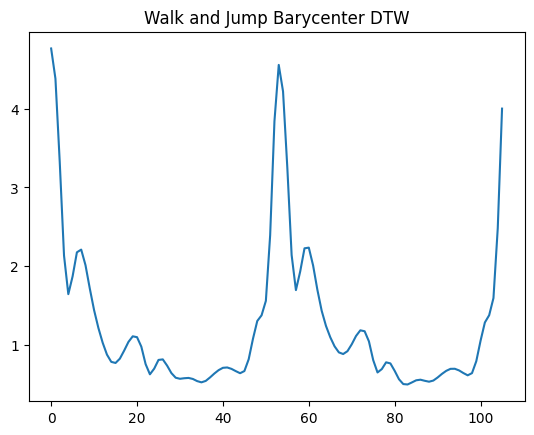

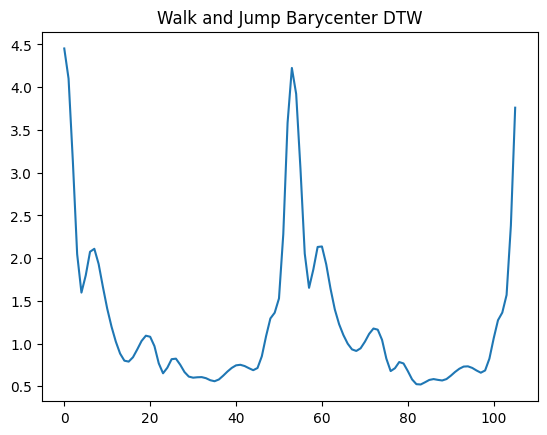

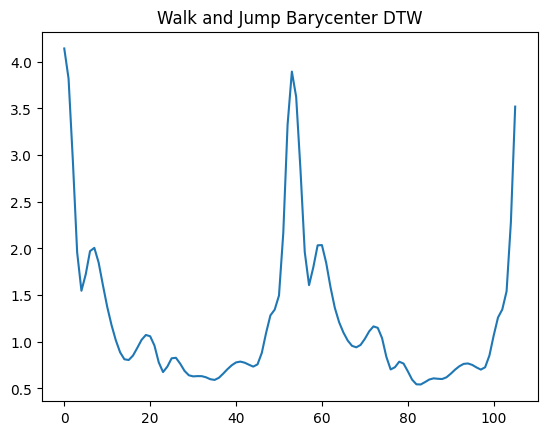

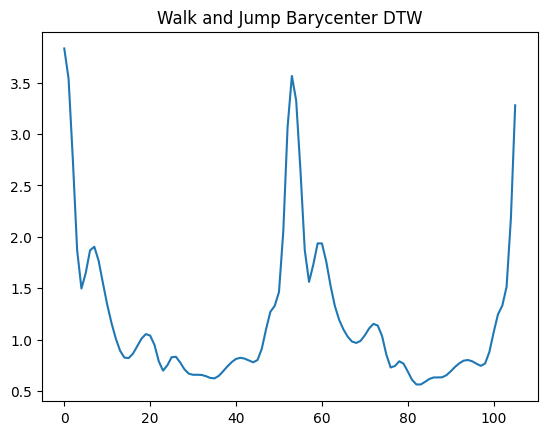

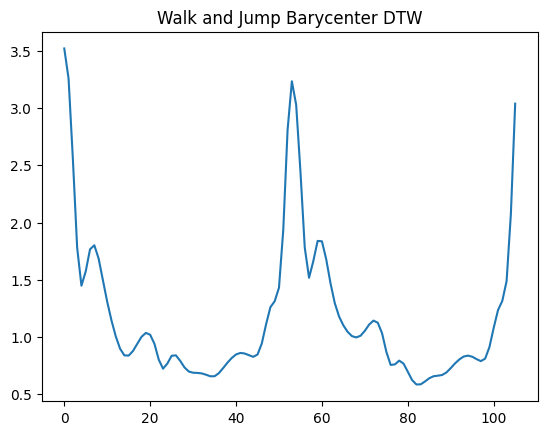

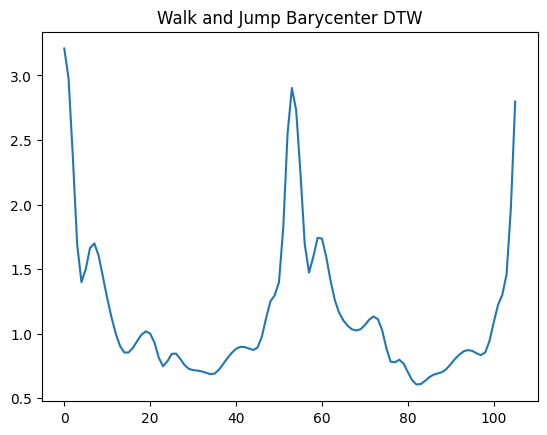

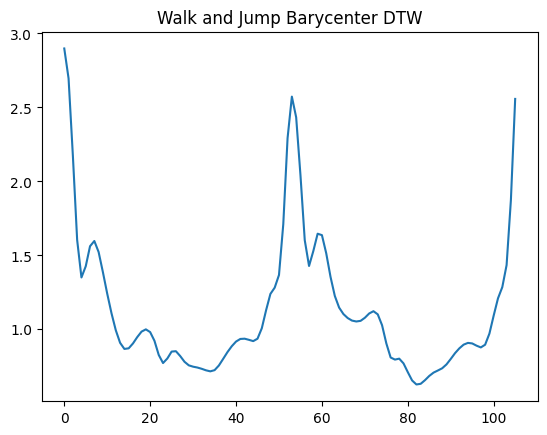

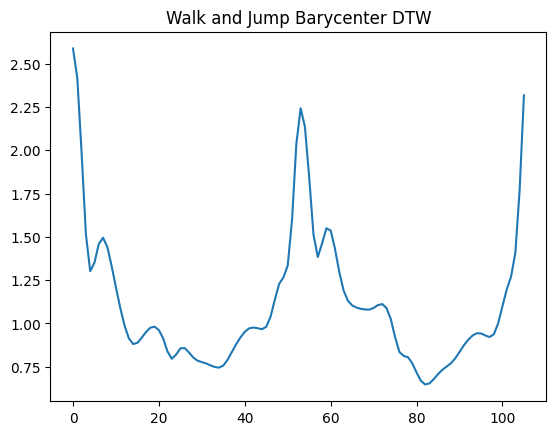

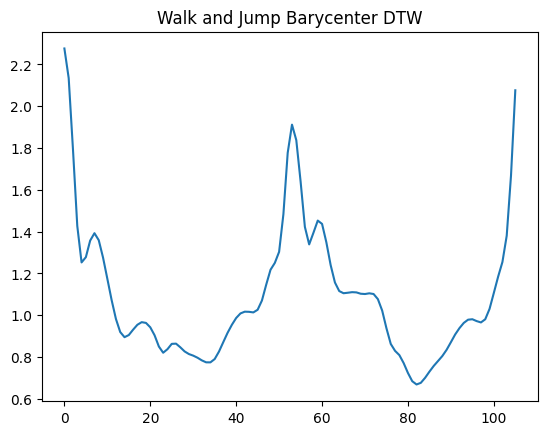

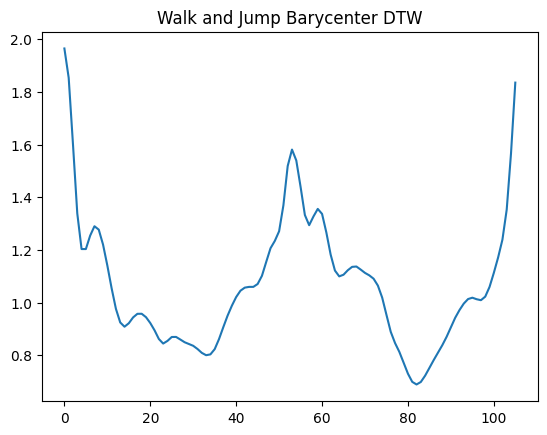

In [21]:
df1 = pd.DataFrame(walk_rs)
# double the jump shapelets, because one cycle of walk and skip is two cycle of jump
df2 = pd.concat([pd.DataFrame(jump_rs), pd.DataFrame(jump_rs)], ignore_index=True)
weight = 1
while weight <= 2:
    weighted_df = weighted_dtw(df1, df2, weight)
    print("Barycenter DataFrame:")
    ax = weighted_df.plot(legend=False)
    ax.set_title('Walk and Jump Barycenter DTW')
    ax = pd.DataFrame(skip_rs).plot(legend=False)
    ax.set_title("Skip shape")
    # plt.show()
    # Distance Comparison
    distance, path = fastdtw(weighted_df, pd.DataFrame(skip_rs))
    print("Distance of walk_jump_barycenter with skip is:", distance)
    distance, path = fastdtw(pd.DataFrame(walk_rs), pd.DataFrame(skip_rs))
    print("Distance of walk with skip is:", distance)
    distance, path = fastdtw(pd.DataFrame(jump_rs), pd.DataFrame(skip_rs))
    print("Distance of jump with skip is:", distance)
    weight += 0.1